

Project Topic: Employee Turnover Prediction



In [ ]:
# Perform necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

# Imports related to classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# Imports related to confusion matrix
from sklearn.tree import export_graphviz
import pydotplus as pydotplus
  
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Load csv data into numpy array, skip header row and specify data types.

data = np.genfromtxt("emp_turnover.csv", delimiter=',', skip_header=1,
                     dtype={'names': ('Tenure', 'Age', 'Category', 'Gender', 'Department', 'Dept_Ratio', 'Amount', 'Class'),
                            'formats': ('i4', 'i4', 'i4', 'i4', 'i4', 'f8', 'f8', 'U10')})

In [ ]:
# View the shape and first five rows of array to get a better feel for the data.
print (data.shape)
data[:5]

(1056,)


array([(1958, 32, 0, 0, 13, 0.006, 39.3733, 'Non-active'),
       (3894, 61, 1, 1, 28, 0.046, 23.0003, 'Non-active'),
       (1672, 22, 2, 0, 17, 0.03 , 21.3228, 'Non-active'),
       (1116, 30, 2, 1, 27, 0.012, 21.3228, 'Non-active'),
       (1795, 24, 2, 0, 21, 0.014, 28.339 , 'Non-active')],
      dtype=[('Tenure', '<i4'), ('Age', '<i4'), ('Category', '<i4'), ('Gender', '<i4'), ('Department', '<i4'), ('Dept_Ratio', '<f8'), ('Amount', '<f8'), ('Class', '<U10')])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

# Function to measure accuracy
def calculate_accuracy(predicted, actual):
	return sum(predicted == actual)/len(actual)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

I think it is important to understand the structure of the data, particularly as I'm used to working with dataframes.

   Tenure  Age  Category  Gender  Department  Dept_Ratio   Amount       Class
0    1958   32         0       0          13       0.006  39.3733  Non-active
1    3894   61         1       1          28       0.046  23.0003  Non-active
2    1672   22         2       0          17       0.030  21.3228  Non-active
3    1116   30         2       1          27       0.012  21.3228  Non-active
4    1795   24         2       0          21       0.014  28.3390  Non-active


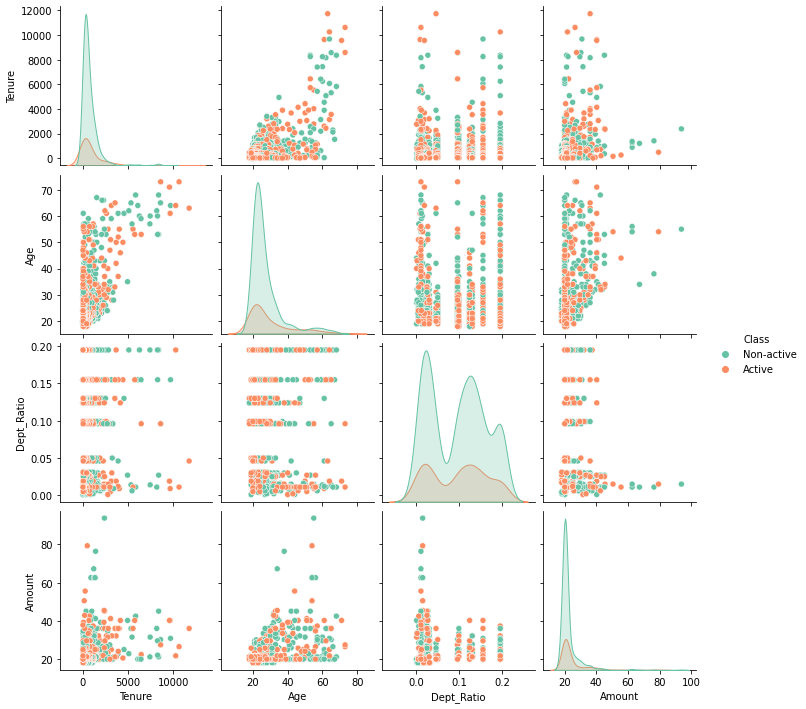

In [ ]:
# Generate a dataframe and pair plot to quickly see what the original numberic fields look like.
df = pd.read_csv('emp_turnover.csv')
# Review first five rows of the dataframe
print (df.head())
# Generate pair plot
sns.pairplot(df.dropna(), vars=['Tenure', 'Age', 'Dept_Ratio', 'Amount'], hue='Class', palette="Set2");

Try a decision tree classifier with a basic approach to splitting training data, initially as a fraction.



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Set the fraction of data which should be in the training set
fraction_training = 0.70

# Function to split training & testing data via the above fraction
def splitdata_train_test(data, fraction_training):
    # shuffle the numpy array
    np.random.seed(0)
    np.random.shuffle(data)
    split = int(len(data)*fraction_training)
    return data[:split], data[split:]

# Function to generate features and targets from data array.
def generate_features_targets(data):
    # assign the last column 'Class' to targets
    targets = data['Class']
    # assign selected columns to features
    features = np.empty(shape=(len(data), 4))
    features[:, 0] = data['Tenure']
    features[:, 1] = data['Age'] 
    features[:, 2] = data['Dept_Ratio'] # feature calculated in csv file via Excel
    features[:, 3] = data['Amount']
        
    return features, targets

# Function to split the data and train a decision tree classifier
def dtc_predict_actual(data):
    # split the data into training and testing sets using a training fraction of 0.7
    train, test = splitdata_train_test(data, fraction_training)

    # generate the feature and targets for the training and test sets
    # i.e. train_features, train_targets, test_features, test_targets
    train_features, train_targets = generate_features_targets(train)
    test_features, test_targets = generate_features_targets(test)

    # instantiate a decision tree classifier
    dtc = DecisionTreeClassifier()

    # train the classifier with the train_features and train_targets
    dtc.fit(train_features, train_targets)

    # get predictions for the test_features
    predictions = dtc.predict(test_features)

    # return the predictions and the test_targets
    return predictions, test_targets


# Call the dtc_predict_actual function and pass data
predicted_class, actual_class = dtc_predict_actual(data)


# calculate the model score using our support function
model_score = accuracy_score(predicted_class, actual_class)
print("Our accuracy score:", model_score)

# Print some initial results
print("Some initial results...\n   predicted,  actual")
for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Our accuracy score: 0.7381703470031545
Some initial results...
   predicted,  actual
0. Non-active, Active
1. Active, Non-active
2. Non-active, Non-active
3. Non-active, Non-active
4. Non-active, Non-active
5. Non-active, Non-active
6. Non-active, Non-active
7. Non-active, Non-active
8. Non-active, Non-active
9. Active, Active


The Decision Tree has done a reasonable job, considering there is not really a large array of high quality features/variables to choose from.



In [ ]:
# Use ExtraTreesClassifier to determine feature importance, so it can be compared to the decision tree structure

X, Y = generate_features_targets(data)
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print (model.feature_importances_)

[0.50752959 0.21670349 0.14185128 0.13391563]


The feature order of importance is from largest to smallest; Tenure, Age, followed by either Dept_Ratio or Amount, which are similar in importance.

In [ ]:
from io import StringIO

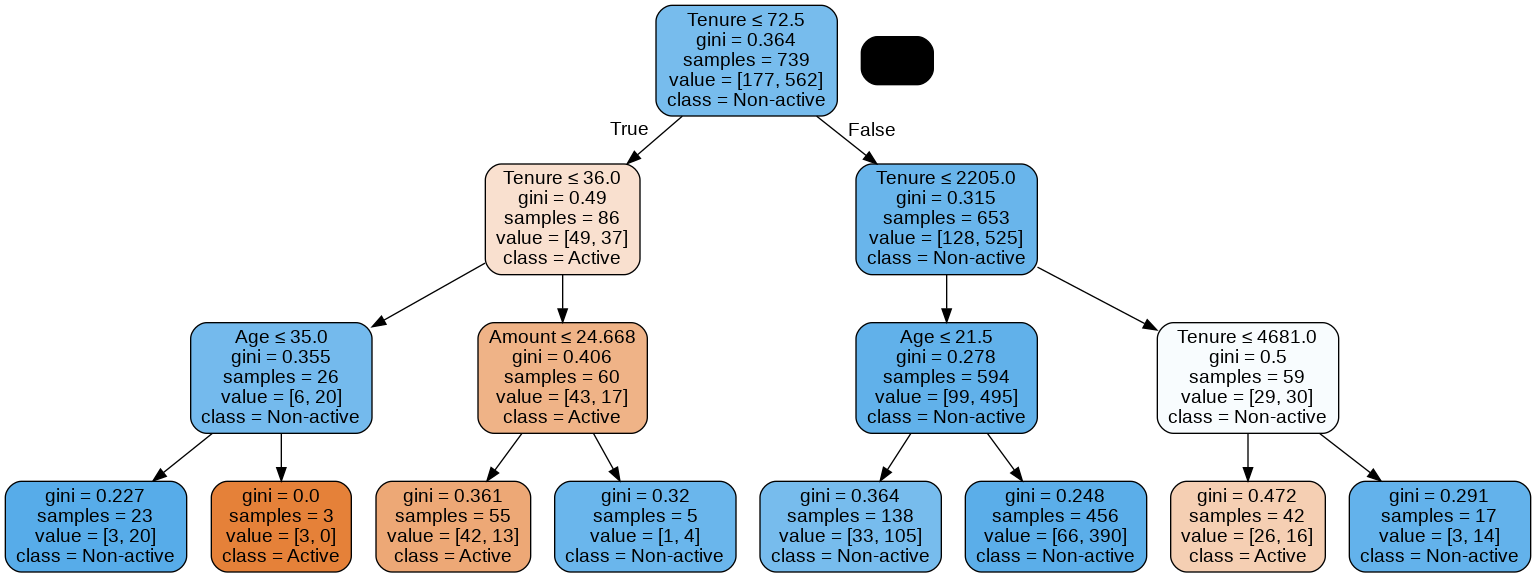

In [ ]:
# split the data into training and testing sets as per above code cell method
train, test = splitdata_train_test(data, fraction_training)

# generate the feature and targets for the training and test sets
train_features, train_targets = generate_features_targets(train)
test_features, test_targets = generate_features_targets(test)

# Create a new decision tree classifier with limited depth and fit
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(train_features, train_targets)

# Use graphviz, pydotplus to view the decision tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
               feature_names=['Tenure', 'Age', 'Dept_Ratio', 'Amount'], class_names=list(set(train_targets)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_jpg("decision_tree_sample.jpg")

One of the biggest advantages of using Decision Trees is the ease with which we can see what features or variables contribute to the classification and their relative importance based on their location depthwise in the tree. Features at the root (top) of the tree are considered more important for decision making. Tenure is consistently at the top, indicating that it is the most useful feature. This aligns to the Extra Trees model above and is intuitive because the Tenure feature showed a clearer relationship in the previous scatter plots.



To summarise what the decision tree does in pseudocode:

1. Place the best feature of our dataset at the root of the tree (Tenure in our example).


2. Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.


3. Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.
In the above decision tree example, I have set the depth to 3, so it is possible get an understanding of how the decision tree is calculated. If the Decision Tree was based on maximum depth set to None (default), then nodes are expanded until all leaves are pure which would be too complex to review, or even read, without zooming in on only a part of the tree.



Note: the above tree will change each time it is run, due to the random shuffle approach in the splitdata_train_test function.



Samples are gradually broken down via a sequence of decisions until there is a leaf node (containing only a single sample, gini = 0.0). Sometimes when I run the above tree at a depth of 3, I can see a leaf node or two. The number of samples above is 739, which is the full data set 1056 multiplied by the training fraction of 0.7.

Use the decision tree classifier again with cross validation, rather than a manual fraction.

Our accuracy score: 0.8049242424242424


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

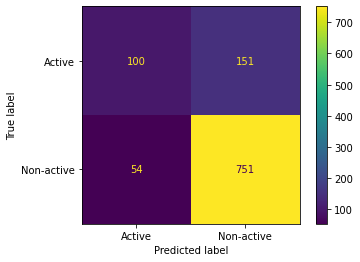

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Call function to generate features and targets
features, targets = generate_features_targets(data)

# get predictions using 10-fold cross validation with cross_val_predict
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy')
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score using support function
model_score = accuracy_score(predicted, targets)
print("Our accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(predicted))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.

plt.figure()
plot_confusion_matrix(dtree,features,targets)
plt.savefig('dt_confusion_matrix.png')
plt.show();

Use a Random Forest classifier to predict classes.

Accuracy score: 0.8134469696969697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

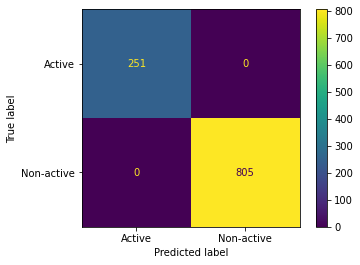

In [ ]:
# Get predictions from a random forest classifier

def rf_predict_actual(data, n_estimators):
    # generate the features and targets
    features, targets = generate_features_targets(data)

    # instantiate a random forest classifier
    rfc = RandomForestClassifier(n_estimators=n_estimators)
  
    rfc.fit(features,targets)
    # get predictions using 10-fold cross validation with cross_val_predict
    predicted = cross_val_predict(rfc, features, targets, cv=10)

    # return the predictions and their actual classes
    return rfc,predicted, targets

    
# get the predicted and actual classes
number_estimators = 50    # Number of trees
rfc,predicted, actual = rf_predict_actual(data, number_estimators)

# calculate the model score using the calling the previously created function
accuracy = accuracy_score(predicted, actual)
print("Accuracy score:", accuracy)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

# plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(rfc,features,targets)
plt.savefig('rf_confusion_matrix.png')
plt.show();

Note; the Random Forest classifier is achieving a slightly higher overall accuracy, with:



 
*   more Active predictions correct

*   less misclassifications for the Non-active class



It is possible that if I had higher quality features, the difference would be more noticeable between the single Decision Tree and the Random Forest.



I would expect the predicted Non-active cohort that are actually Active, to have a higher probability of resigning in the foreseeable future.

In [ ]:
# Print some initial results, including selected features
print("Some initial results...\n   predicted,  actual, Tenure, Age, Dept_Ratio, Amount")
for i in range(10):
    print("{}. {}, {}, {}, {}, {}, {}".format(i, predicted[i], actual[i],
                                          features[i, 0], features[i, 1], features[i, 2], features[i, 3]))

Some initial results...
   predicted,  actual, Tenure, Age, Dept_Ratio, Amount
0. Non-active, Non-active, 195.0, 22.0, 0.195, 20.1415
1. Non-active, Non-active, 2506.0, 26.0, 0.13, 23.3901
2. Non-active, Non-active, 566.0, 21.0, 0.155, 20.1415
3. Non-active, Non-active, 132.0, 20.0, 0.195, 20.1415
4. Non-active, Non-active, 199.0, 22.0, 0.016, 20.1415
5. Non-active, Active, 37.0, 36.0, 0.096, 20.1415
6. Non-active, Non-active, 375.0, 21.0, 0.027, 18.29
7. Active, Active, 212.0, 21.0, 0.13, 21.3228
8. Non-active, Non-active, 181.0, 33.0, 0.195, 20.1415
9. Non-active, Active, 51.0, 33.0, 0.155, 20.1415


I'm interested in the misclassifications where predicted class = Non-active and actual class = Active.



According to the above algorithms, these employees should have a higher likelihood of resigning in the future. With this in mind, lets take a quick look and export to a csv file if necessary.



Note: I tried to create a numpy array rather than a list, but ran into difficulties with a TypeError: "invalid type promotion". I decided to just use a list as it was easier with multiple data types.

In [ ]:
# Create a list, convert to a dataframe and review.

# create empty list
errors = []

# loop through the output of the rf_predict_actual function for the errors of interest
for i in range(len(predicted)):
    
    if (predicted[i] == 'Non-active') & (actual[i] == 'Active'):
        errors.append([predicted[i], actual[i], features[i, 0], features[i, 1], features[i, 2], features[i, 3]])
                
# create a dataframe and set column names
error_df = pd.DataFrame(errors, columns=('predicted', 'actual', 'tenure', 'age', 'dept_ratio', 'amount'))

# take a look
print (error_df.head())
print (error_df.describe())   # count can be reconciled with the top-right quadrant of the confusion matrix

    predicted  actual  tenure   age  dept_ratio   amount
0  Non-active  Active    37.0  36.0       0.096  20.1415
1  Non-active  Active    51.0  33.0       0.155  20.1415
2  Non-active  Active   212.0  23.0       0.130  21.3228
3  Non-active  Active   714.0  33.0       0.006  42.5983
4  Non-active  Active   113.0  27.0       0.031  25.8709
            tenure         age  dept_ratio      amount
count    127.00000  127.000000  127.000000  127.000000
mean    1248.19685   31.228346    0.093693   24.905585
std     1952.36707   12.516775    0.059946    8.449323
min       16.00000   18.000000    0.001000   18.290000
25%      239.50000   22.000000    0.028500   20.141500
50%      623.00000   27.000000    0.099000   21.322800
75%     1285.00000   35.500000    0.130000   25.870900
max    11727.00000   73.000000    0.195000   79.326900


In [ ]:
# Export errors to csv file for cataloguing if necessary.
from datetime import datetime

# create timestamp string
date_stamp = datetime.now().strftime('%d.%m.%Y')
# convert string to date time object and add column to error_df
error_df['date'] = pd.to_datetime(date_stamp)
# export to csv
error_df.to_csv('errors_' + date_stamp + '.csv', sep=',', index=False)